# Задание

   Сравнить распределение каждой переменной на выборке выданных кредитов с
распределением этой же переменной на выборке отказанных кредитов.
Прокомментировать причину различий. Дополнить комментарии графиками, выбрав
4-5 показательных признаков. Если есть переменные, между которыми различий в
распределении не наблюдается, объяснить причину.

Придумать/найти и реализовать алгоритм сэмплирования выборки выданных
кредитов. Сэмплирование - удаление некоторых наблюдений из выборки. В результате
сэмплирования вид и параметры распределения каждой переменной на выборке
выданных кредитов должны стать такими же или близкими, как на всей выборке.

# Постановка задачи

---


*Первая часть - сравнение выборок выда*


---

1. Предворительный анализ датасета
2. Изучение целевых переменных 
3. Разделение рассматриваемых признаков на две выборки - отказы и одобрения
4. Выявление главных переменных, характеризующих выборку, различия в выборках
6. Построение распределения для нескольких признаков и сравнение
7. Объяснение результатов
8. Построение графиков
---


*Вторая часть - Сэмплирование*


---


1. Предварительная очистка данных
2. Определение алгоритма сэмплирования
3. Применение алгоритма на наших данных
4. Построение графиков, и отображение результа, цель - иметь максимально схожие распределение на выборке выданных кредитов и на всей выборке


# Импорт библиотек

In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import ClusterCentroids,OneSidedSelection,TomekLinks, RandomUnderSampler,\
CondensedNearestNeighbour,EditedNearestNeighbours,NearMiss, NeighbourhoodCleaningRule

import warnings
warnings.filterwarnings("ignore");


# Импорт данных

In [114]:
df = pd.read_csv('train.csv')

**Переменные, характеризующие кредитную историю клиента**

-  cred_sum_cc_all - сумма кредитов по кредитным картам
-   mfo_inqs_count_month - количество запросов на кредиты в другие в МФО
-   all_closed_creds_sum_all количество закрытых кредитов
-   bank_inqs_count_quarter - количество запросов на кредиты в банки
-   cred_max_overdue_max_ly - максимальная просрочка за год
-   all_active_creds_sum_all - денежная сумма всех активных кредитов
-   mfo_last_days_all - Количество дней с последнего займа в МФО
-   cred_sum_cc_ly - Сумма лимитов кредитных карт, оформленных за последний год
-   cred_sum_debt_all_all - Сумма задолженности по всем кредитам
-   all_closed_creds_sum_ly - Сумма закрытых кредитов за последний год
-   mfo_cred_mean_sum_3lm - Средняя сумма МФО кредитов, выданных за последние 3
    месяца
-   delay_more_sum_all - Количество просрочек более чем на 90 дней по всем кредитам
-   all_creds_count_all - Общее количество кредитов
-   cred_day_overdue_all_sum_all - Суммарное количество дней просрочки текущих
    активных кредитов
-   cred_max_overdue_max_3lm - Максимальная сумма просроченной задолженности, по
    кредитам взятым за последние 3 месяца
-   mfo_closed_count_ly - Количество закрытых МФО кредитов, взятых за последний год
-   cred_sum_overdue_cc_all - Сумма просрочек по кредитным картам
-   count_overdue_all_3lm - Количество кредитов на просрочке, взятых за последние 3
    месяца
-   all_creds_count_lm - Количество кредитов, взятых за последний месяц
-   region - регион подачи заявки

**Переменные характеризующие клиента**
-   work_code - Профессия. 1 - госслужащий (полицейский, медсестра), 2 - офисный
    работник (бухгалтер, программист), 3 - не указано, 4 - другое, 5 - рабочие профессии
    (слесарь, токарь)
-   month_income - доход

**Целевые переменные:**
-   bad - 1 - кредит просрочен, 0 - кредит возвращен, nan - отказ.
-   approved - 1 - кредит одобрен, 0 - отказано.

# Предворительный анализ

In [5]:
df

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.00,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.00,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.00,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.00,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.00,...,0.0,0,0.00,0,0,5,35000,34,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,6697173,0.0,0,0,3,0.0,0,733,0.0,0.00,...,0.0,0,0.00,0,0,3,35000,60,NaN,0
23112,6697212,0.0,1,25400,3,9500.0,17750,49,0.0,0.00,...,9500.0,5,0.00,1,0,5,20000,7,NaN,0
23113,6697215,1000.0,0,64490,2,0.0,1000,414,0.0,0.00,...,0.0,0,0.00,0,0,4,35000,94,NaN,0
23114,6697264,0.0,3,52080,0,7000.0,18132,15,0.0,5783.65,...,0.0,13,0.00,0,1,3,35000,46,NaN,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_id                      23116 non-null  int64  
 1   cred_sum_cc_all               23116 non-null  float64
 2   mfo_inqs_count_month          23116 non-null  int64  
 3   all_closed_creds_sum_all      23116 non-null  int64  
 4   bank_inqs_count_quarter       23116 non-null  int64  
 5   cred_max_overdue_max_ly       23116 non-null  float64
 6   all_active_creds_sum_all      23116 non-null  int64  
 7   mfo_last_days_all             23116 non-null  int64  
 8   cred_sum_cc_ly                23116 non-null  float64
 9   cred_sum_debt_all_all         23116 non-null  float64
 10  all_closed_creds_sum_ly       23116 non-null  int64  
 11  mfo_cred_mean_sum_3lm         23116 non-null  float64
 12  delay_more_sum_all            23116 non-null  int64  
 13  a

In [7]:
df.describe()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
count,2.311600e+04,2.311600e+04,23116.000000,2.311600e+04,23116.000000,2.311600e+04,2.311600e+04,23116.000000,23116.000000,2.311600e+04,...,23116.000000,23116.000000,2.311600e+04,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,7269.000000,23116.000000
mean,6.060602e+06,4.424794e+04,1.284262,1.653574e+05,3.760642,4.070925e+03,1.284212e+05,2615.988925,10672.104919,8.414683e+04,...,1107.137568,3.474087,4.878172e+03,0.118576,1.080637,3.433250,39363.189998,47.632203,0.270051,0.314458
std,3.678480e+05,1.006016e+05,2.373415,4.788942e+05,5.057107,2.689042e+04,3.890718e+05,4228.621029,37246.943546,3.054724e+05,...,7073.931364,9.202313,3.793714e+04,0.466854,2.137757,1.370812,13887.644526,27.615823,0.444016,0.464310
min,5.498546e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.739749e+06,0.000000e+00,0.000000,3.000000e+03,0.000000,0.000000e+00,2.000000e+03,13.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,35000.000000,25.000000,0.000000,0.000000
50%,6.020794e+06,5.000000e+03,0.000000,3.083450e+04,2.000000,0.000000e+00,1.500000e+04,83.500000,0.000000,5.000000e+03,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.000000,35000.000000,46.000000,0.000000,0.000000
75%,6.445488e+06,4.972685e+04,2.000000,1.357758e+05,5.000000,3.000000e+03,7.500000e+04,2070.500000,0.000000,3.496056e+04,...,0.000000,3.000000,0.000000e+00,0.000000,1.000000,5.000000,50000.000000,70.000000,1.000000,1.000000
max,6.697265e+06,5.739786e+06,25.000000,3.030997e+07,67.000000,1.914581e+06,1.200000e+07,9999.000000,878000.000000,1.150825e+07,...,673495.420000,344.000000,2.878197e+06,10.000000,48.000000,5.000000,65000.000000,99.000000,1.000000,1.000000


In [14]:
print(f"Размер выборки не одобренных - {len(df[df.approved == 0])}\nРазмер выборки одобренных - {len(df[df.approved == 1])}\n",
     f'Размер выборки отданных - {len(df[df.approved == 1][df.bad==0])}\nРазмер выборки не отданных - {len(df[df.approved == 1][df.bad==1])}')

Размер выборки не одобренных - 15847
Размер выборки одобренных - 7269
 Размер выборки отданных - 5306
Размер выборки не отданных - 1963


Как можно заметить, наши выборки недостаточно сбалансированны, и во второй части это необходимо будет исправить. Также видно, что в некоторых переменных есть сильно отклоняющиеся значения, это тоже необходимо будет исправить.

# Изучение целевых переменных

## Approved

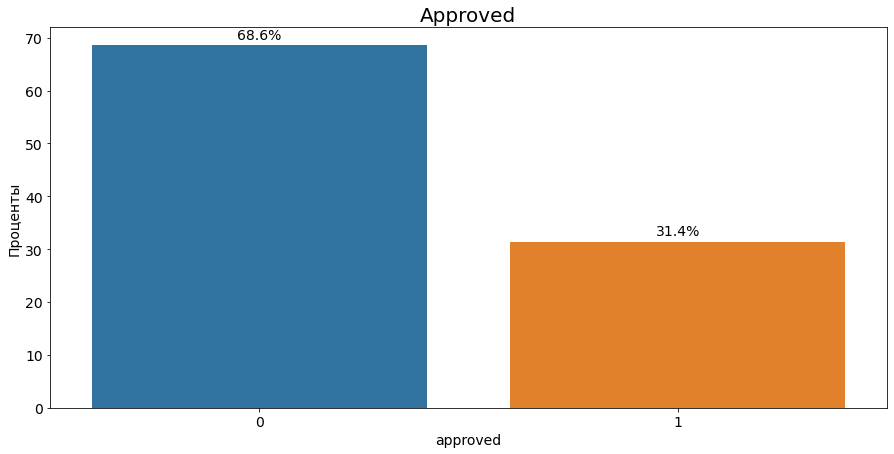

In [15]:
# нормирование на размер датасета
norm_target = (df
               .approved
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Approved', fontsize=20)

plt.xlabel('approved', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Bad

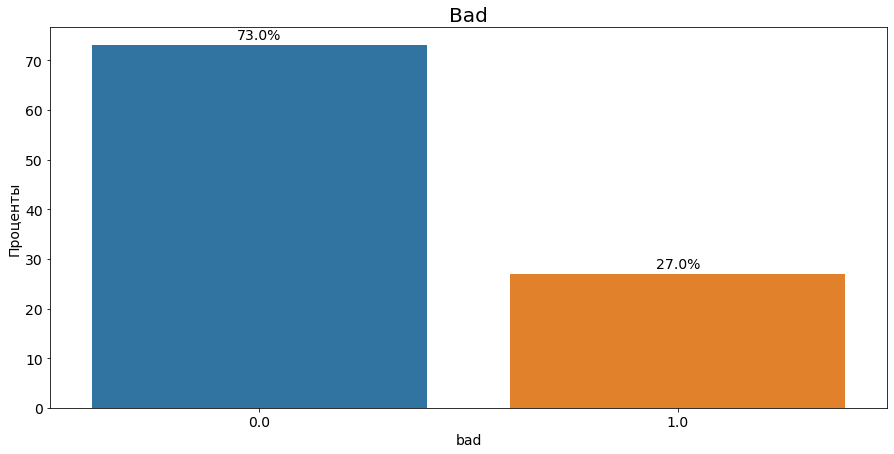

In [16]:
# нормирование на размер датасета
norm_target = (df[df.approved == 1]
               .bad
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Bad', fontsize=20)

plt.xlabel('bad', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Work_code

- 1 - госслужащий (полицейский, медсестра), 
- 2 - офисный работник (бухгалтер, программист), 
- 3 - не указано, 
- 4 - другое, 
- 5 - рабочие профессии (слесарь, токарь)

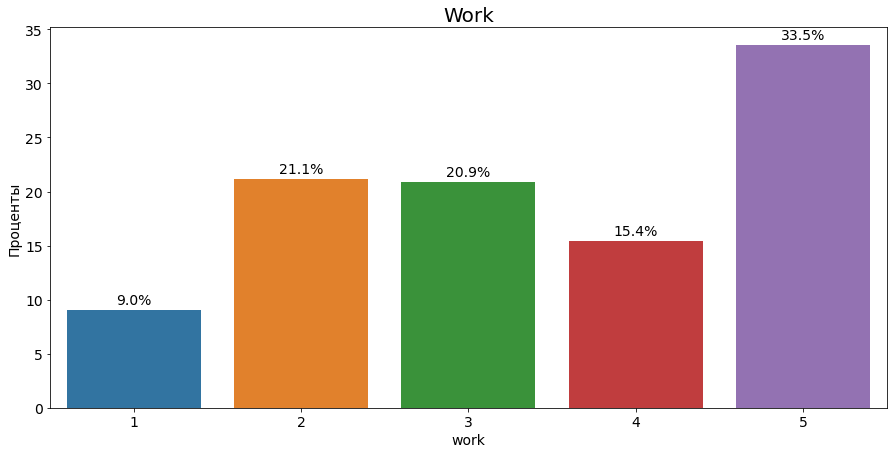

In [58]:
# нормирование на размер датасета
norm_target = (df
               .work_code
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Work', fontsize=20)

plt.xlabel('work', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

На графике видно, что у нас присутствует несбалансирвоанность классов 

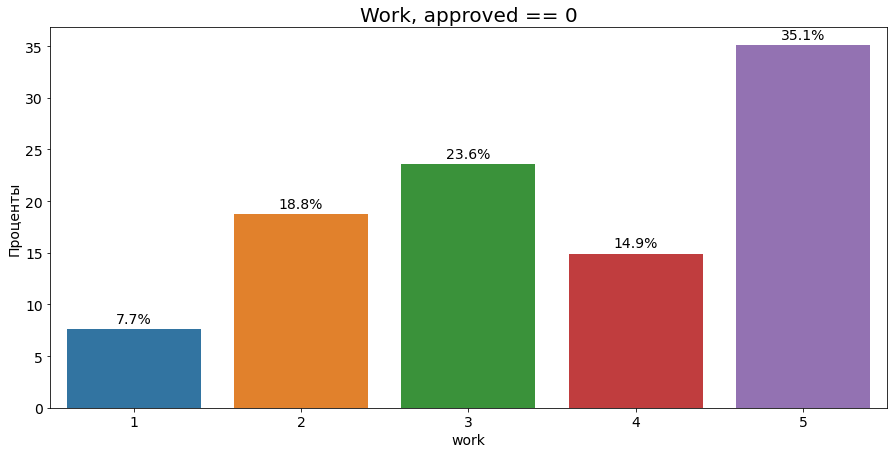

In [72]:
# нормирование на размер датасета
norm_target = (df[df.approved==0]
               .work_code
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Work, approved == 0', fontsize=20)

plt.xlabel('work', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

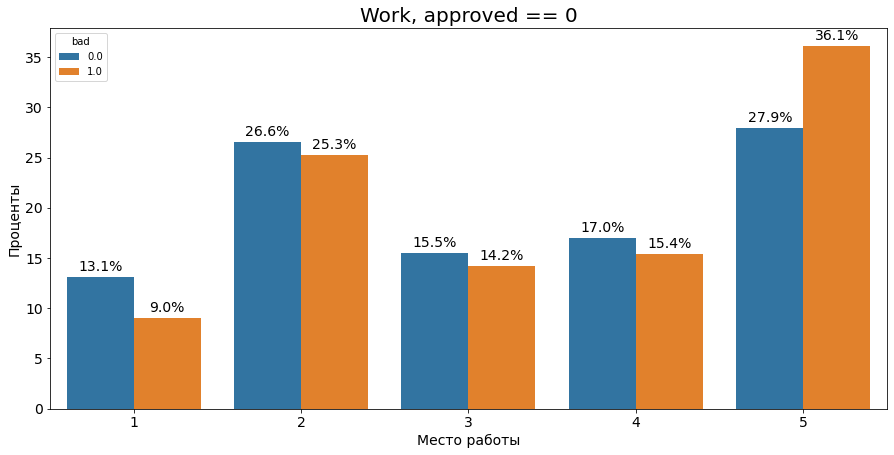

In [107]:
plt.figure(figsize=(15, 7))

educ_def = (df[df.approved==1].groupby(['bad'])['work_code']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('work_code'))

ax = sns.barplot(x="work_code", y="percentage", hue="bad", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Work, approved == 0', fontsize=20)
plt.ylabel('Проценты', fontsize=14)
plt.xlabel('Место работы', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Из полученных результатов, можно заметить, что заемщиками, которым скорее выдадут кредит являются госслужащие и офисные работники, а тем кому не выдадут, скорее будут представителями рабочих профессий, или те, кто ничего не указали в поле работы. Насчет тех, кто указал другое место работы, вероятность примерно одинакова. Отдаст ли человек кредит, также зависит от работы, самые добросовесные в этом плане - госслужащие, а те кто скорее не отдаст - рабочие, это скорее всего связано с различными факторами риска и непостоянства такой работы.

## Месячный доход

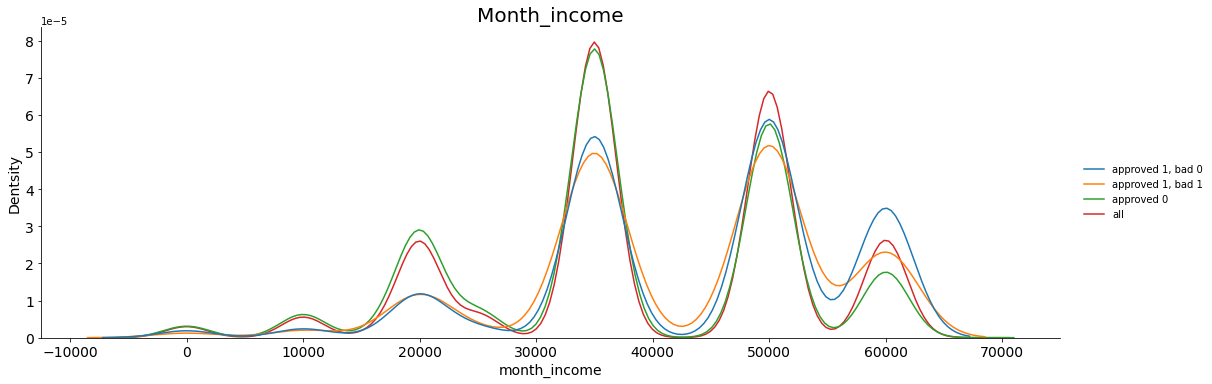

In [110]:
sns.displot(
    {
        "approved 1, bad 0": df[df.approved == 1][df.bad == 0].month_income,
        "approved 1, bad 1": df[df.approved == 1][df.bad == 1].month_income,
        "approved 0": df[df.approved == 0].month_income,
        "all": df.month_income
        
    },
    kind="kde",
    common_norm=False,# независимая нормализация каждого подмножества
    aspect =3
)

plt.title('Month_income', fontsize=20)
plt.xlabel('month_income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

За счет того, что у нас есть дисбаланс классов, у нас получается большая часть распределения ведет себя, как выборка с не одобренным кредитом, но можно заметить выброс в районе по 50 т.р. обусловленный тем, что у тех, кому кредит выдали больше по сравнению с теми, кому не выдали.

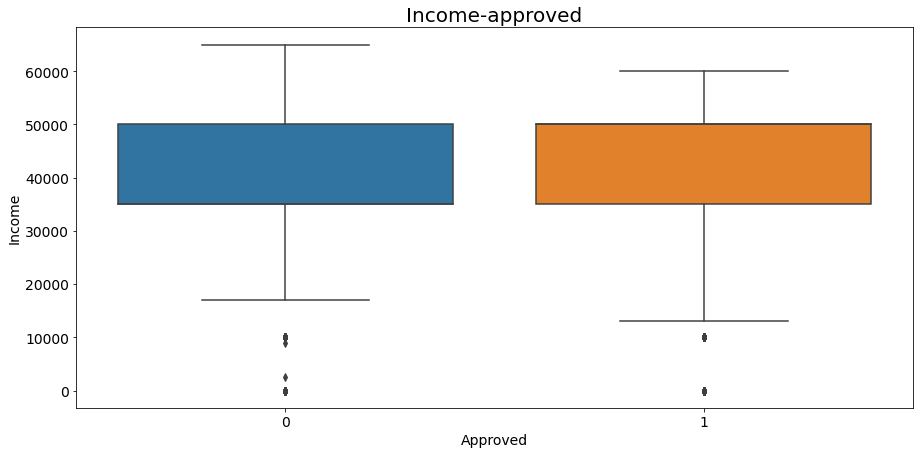

In [127]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='approved', y='month_income', data=df)

plt.title('Income-approved', fontsize=20)
plt.ylabel('Income', fontsize=14)
plt.xlabel('Approved', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [140]:
print('Среднее для тех, кому выдали кредит - ', df[df.approved == 1]['month_income'].mean(), '\n',
      'Стандартное отклонение для тех, кому выдали кредит - ', df[df.approved == 1]['month_income'].std(),'\n',
     'Среднее для тех, кому НЕ выдали кредит - ', df[df.approved == 0]['month_income'].mean(), '\n',
      'Стандартное отклонение для тех, кому НЕ выдали кредит - ', df[df.approved == 0]['month_income'].std())


Среднее для тех, кому выдали кредит -  43297.28986105379 
 Стандартное отклонение для тех, кому выдали кредит -  13217.532242706755 
 Среднее для тех, кому НЕ выдали кредит -  37558.62308323342 
 Стандартное отклонение для тех, кому НЕ выдали кредит -  13814.968000431247


При относительно равных стандартных отклонениях, мы имеем различные средние для месячного дохода, что логично - кредит выдадут тому, у кого выше зарплата.

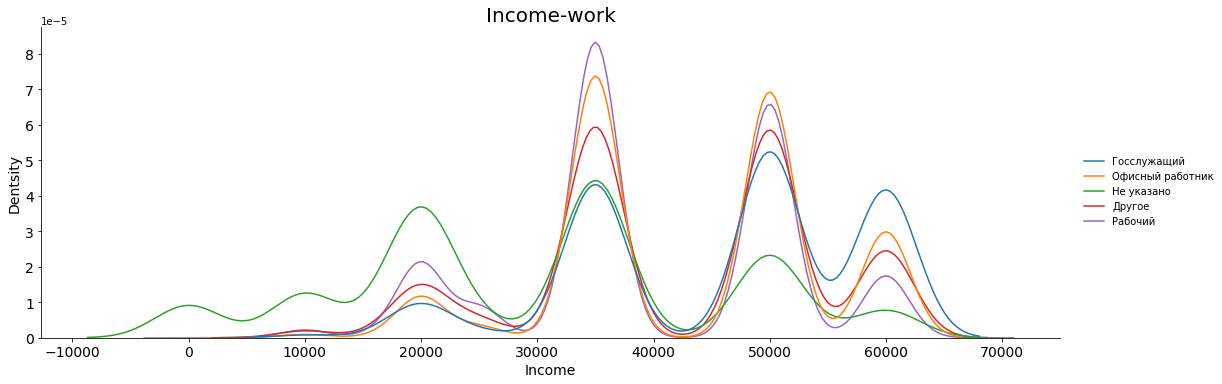

In [126]:
sns.displot(
    {
        "Госслужащий": df[df.work_code == 1].month_income,
        "Офисный работник": df[df.work_code == 2].month_income,
        "Не указано": df[df.work_code == 3].month_income,
        "Другое": df[df.work_code == 4].month_income,
        "Рабочий": df[df.work_code == 5].month_income,
    },
    kind="kde",
    common_norm=False,
    aspect =3
)

plt.title('Income-work', fontsize=20)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

**Какие выводы можно сделать:**
1. Не указывают место работы люди со сравнительно скромными доходами, это сходится с выводом полученным ранее, где выяснилось, что этой группе людей с наименьшей вероятностью одобрят кредит
2. Потенциально госслужащие будут наилучшими клиентами для банка

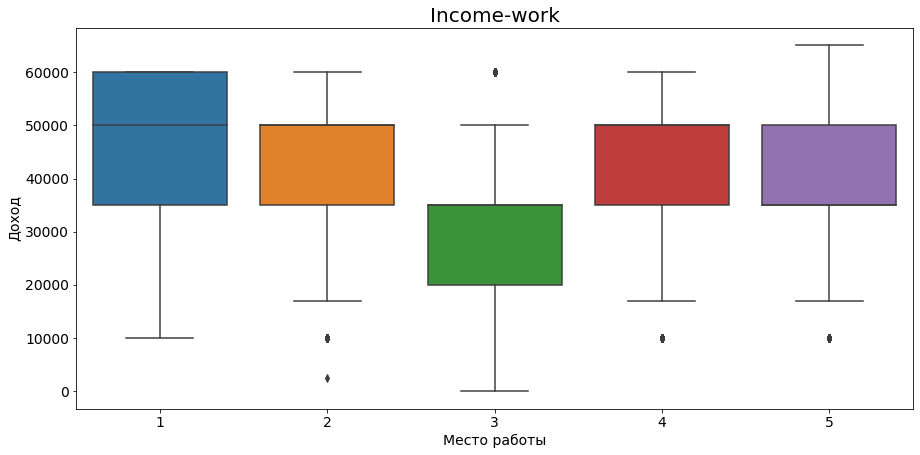

In [97]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='work_code', y='month_income', data=df)

plt.title('Income-work', fontsize=20)
plt.ylabel('Доход', fontsize=14)
plt.xlabel('Место работы', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

На Box-plot можно увидеть все те же самые выводы, госслужащие в среднем зарабатывают больше, и если зарплата для них в 60 тыс. находится на границе квантилии, то для тех кто не указал доход, эту зарплату можно считать "исключением".

# Распределение переменных

## Для начала построим график корреляций, чтобы посмотреть какие признаки оказывают наибольшее влияние на результат

<AxesSubplot:>

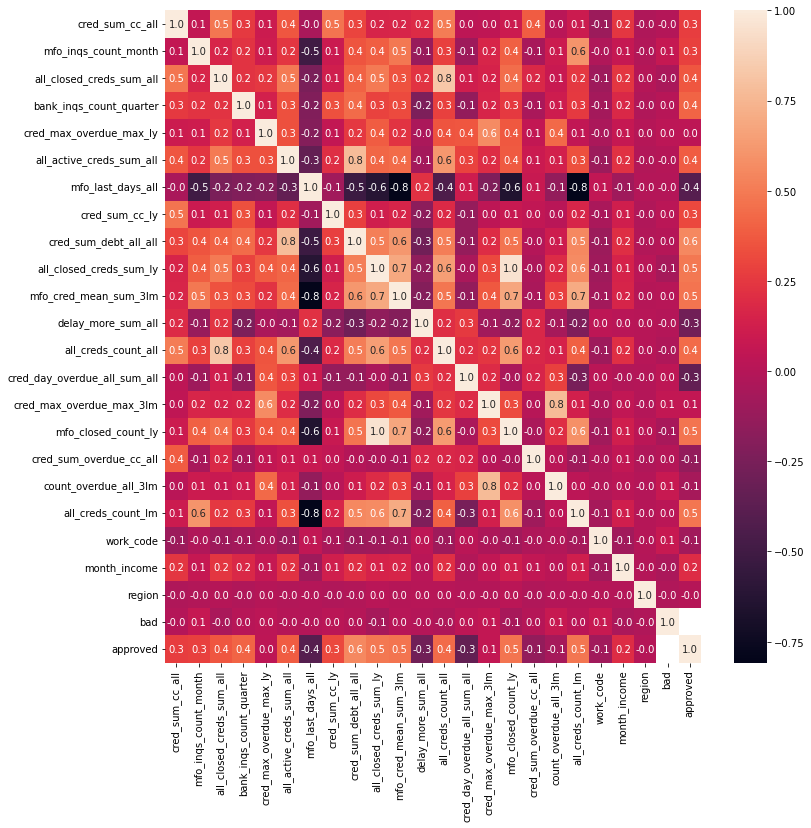

In [109]:
num_cols = ['cred_sum_cc_all', 'mfo_inqs_count_month',
       'all_closed_creds_sum_all', 'bank_inqs_count_quarter',
       'cred_max_overdue_max_ly', 'all_active_creds_sum_all',
       'mfo_last_days_all', 'cred_sum_cc_ly', 'cred_sum_debt_all_all',
       'all_closed_creds_sum_ly', 'mfo_cred_mean_sum_3lm',
       'delay_more_sum_all', 'all_creds_count_all',
       'cred_day_overdue_all_sum_all', 'cred_max_overdue_max_3lm',
       'mfo_closed_count_ly', 'cred_sum_overdue_cc_all',
       'count_overdue_all_3lm', 'all_creds_count_lm', 'work_code',
       'month_income', 'region', 'bad', 'approved']

plt.figure(figsize=(12, 12))

sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt=".1f")

## Переменная - cred_max_overdue_max_3lm

cred_max_overdue_max_3lm - Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца

(0.0, 0.00035)

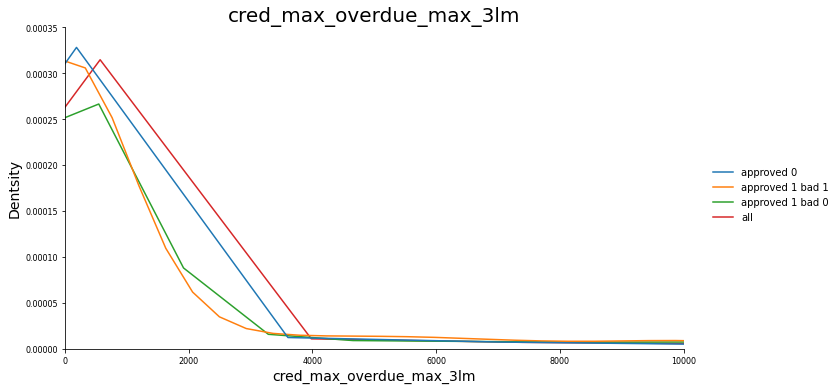

In [157]:
sns.displot(
    {
     "approved 0": df[df.approved == 0].cred_max_overdue_max_3lm,
     "approved 1 bad 1": df[df.approved == 1][df.bad == 1].cred_max_overdue_max_3lm,
     "approved 1 bad 0": df[df.approved == 1][df.bad == 0].cred_max_overdue_max_3lm,
     "all": df.cred_max_overdue_max_3lm,
    },
    kind="kde",
    common_norm=False,
    aspect=2
)

plt.title('cred_max_overdue_max_3lm', fontsize=20)
plt.xlabel('cred_max_overdue_max_3lm', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

plt.xlim(0,10000)
plt.ylim(0,0.00035)

Отличия в распределении не значительные, общий вид один и тот же. Переменная характеризует просрочку, и распределения одинаковы скорее всего потому, что люди у которых уже есть просроченные кредиты не пойдут брать новые.

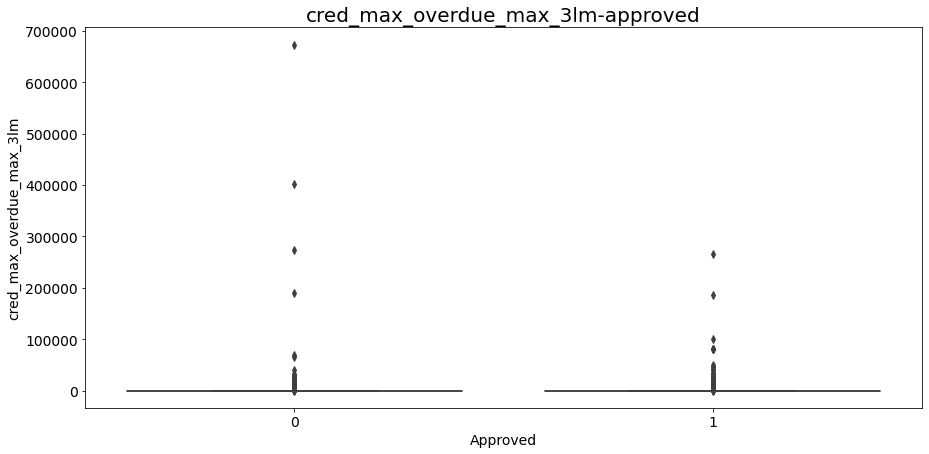

In [158]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='approved', y='cred_max_overdue_max_3lm', data=df)

plt.title('cred_max_overdue_max_3lm-approved', fontsize=20)
plt.ylabel('cred_max_overdue_max_3lm', fontsize=14)
plt.xlabel('Approved', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [161]:
df[df.approved == 0].cred_max_overdue_max_3lm.describe()

count     15847.000000
mean        929.971675
std        7449.216610
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      673495.420000
Name: cred_max_overdue_max_3lm, dtype: float64

In [162]:
df[df.approved == 1].cred_max_overdue_max_3lm.describe()

count      7269.000000
mean       1493.373351
std        6160.091707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      265462.030000
Name: cred_max_overdue_max_3lm, dtype: float64

По данным статистикам можно и графику box-plot выше можно судить о достаточно большой дисперсии, у нас присутствует достаточное количество выбивающихся значений, что говорит о присутствии части людей с долгами, которые хотят взять еще. 

## **all_closed_creds_sum_all количество закрытых кредитов**

(0.0, 3.5e-06)

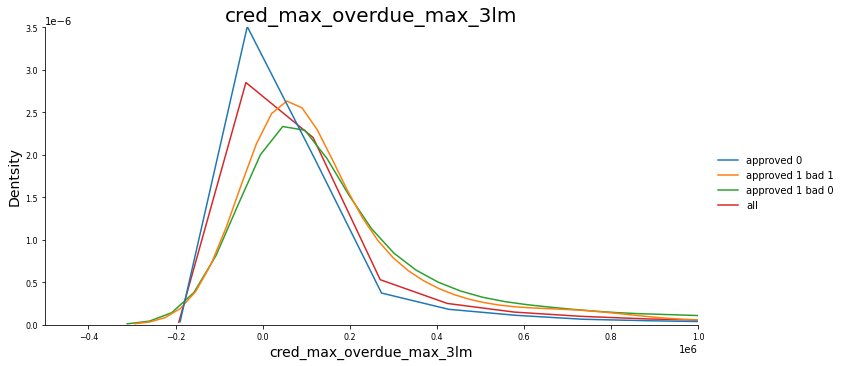

In [186]:
sns.displot(
    {
     "approved 0": df[df.approved == 0].all_closed_creds_sum_all,
     "approved 1 bad 1": df[df.approved == 1][df.bad == 1].all_closed_creds_sum_all,
     "approved 1 bad 0": df[df.approved == 1][df.bad == 0].all_closed_creds_sum_all,
     "all": df.all_closed_creds_sum_all,
    },
    kind="kde",
    common_norm=False,
    aspect=2
)

plt.title('cred_max_overdue_max_3lm', fontsize=20)
plt.xlabel('cred_max_overdue_max_3lm', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

plt.xlim(-500000,1000000)
plt.ylim(0,0.0000035)

In [173]:
df[df.approved == 0].all_closed_creds_sum_all.describe()

count    1.584700e+04
mean     1.165586e+05
std      4.369239e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.499900e+04
75%      7.731700e+04
max      3.030997e+07
Name: all_closed_creds_sum_all, dtype: float64

In [184]:
df[df.approved == 1].all_closed_creds_sum_all.describe()

count    7.269000e+03
mean     2.717425e+05
std      5.446669e+05
min      0.000000e+00
25%      2.990000e+04
50%      9.181100e+04
75%      2.719240e+05
max      9.532402e+06
Name: all_closed_creds_sum_all, dtype: float64

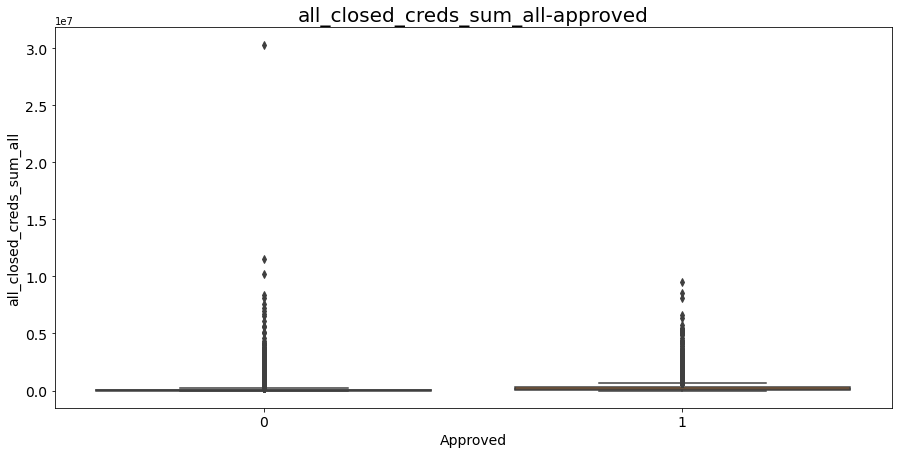

In [188]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='approved', y='all_closed_creds_sum_all', data=df)

plt.title('all_closed_creds_sum_all-approved', fontsize=20)
plt.ylabel('all_closed_creds_sum_all', fontsize=14)
plt.xlabel('Approved', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## **cred_sum_cc_all - сумма кредитов по кредитным картам**

(0.0, 1.5e-05)

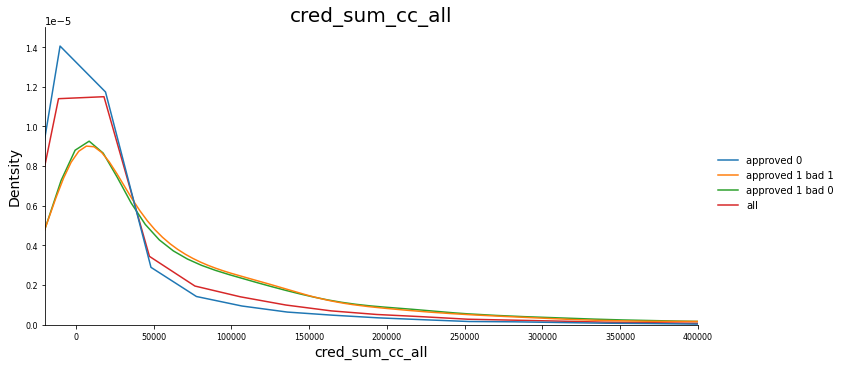

In [199]:
sns.displot(
    {
     "approved 0": df[df.approved == 0].cred_sum_cc_all,
     "approved 1 bad 1": df[df.approved == 1][df.bad == 1].cred_sum_cc_all,
     "approved 1 bad 0": df[df.approved == 1][df.bad == 0].cred_sum_cc_all,
     "all": df.cred_sum_cc_all,
    },
    kind="kde",
    common_norm=False,
    aspect=2
)

plt.title('cred_sum_cc_all', fontsize=20)
plt.xlabel('cred_sum_cc_all', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

plt.xlim(-20000,400000)
plt.ylim(0,0.000015)

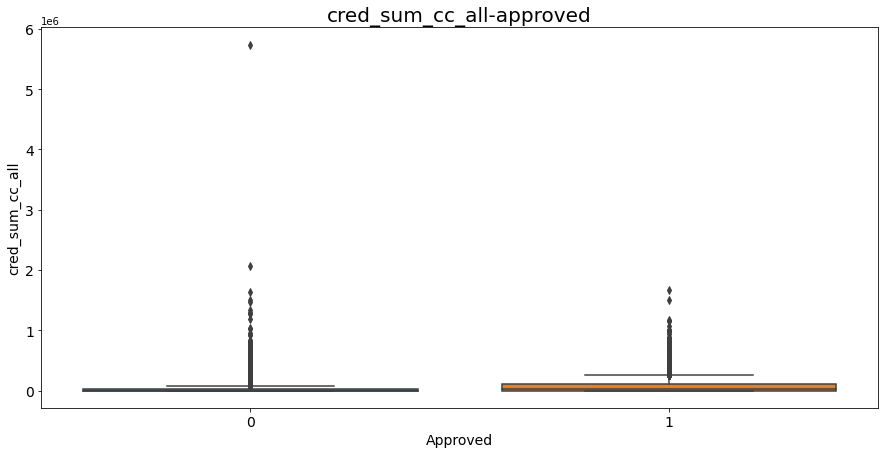

In [194]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='approved', y='cred_sum_cc_all', data=df)

plt.title('cred_sum_cc_all-approved', fontsize=20)
plt.ylabel('cred_sum_cc_all', fontsize=14)
plt.xlabel('Approved', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [201]:
df[df.approved == 0].cred_sum_cc_all.describe()

count    1.584700e+04
mean     3.109119e+04
std      9.095817e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e-01
75%      2.700000e+04
max      5.739786e+06
Name: cred_sum_cc_all, dtype: float64

In [202]:
df[df.approved == 1].cred_sum_cc_all.describe()

count    7.269000e+03
mean     7.293070e+04
std      1.137953e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+04
75%      1.000000e+05
max      1.669000e+06
Name: cred_sum_cc_all, dtype: float64

На этой переменной мы видим разницу в среднем значении, что логично, и также, разницу в стандартном отклонении. Разность в распределениии достигается тем фактором, что с увеличением суммы по кредитным картам и отсутствии просрочек, соответственно кредитоспособности, тебе могут одобрить еще один кредит.

## **cred_sum_overdue_cc_all - Сумма просрочек по кредитным картам**

(0.0, 0.0003)

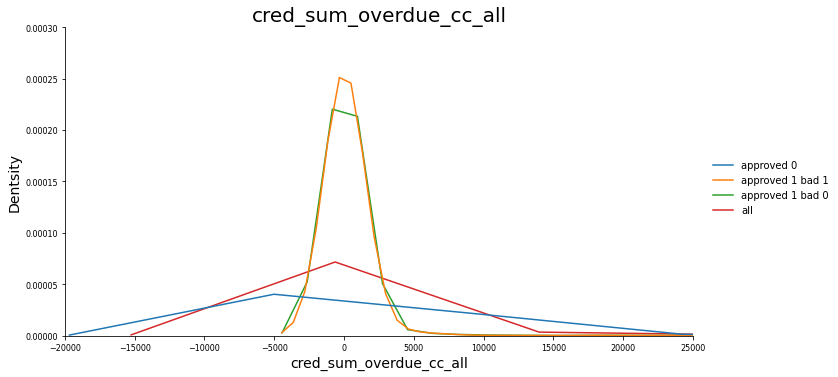

In [261]:
sns.displot(
    {
     "approved 0": df[df.approved == 0].cred_sum_overdue_cc_all,
     "approved 1 bad 1": df[df.approved == 1][df.bad == 1].cred_sum_overdue_cc_all,
     "approved 1 bad 0": df[df.approved == 1][df.bad == 0].cred_sum_overdue_cc_all,
     "all": df.cred_sum_overdue_cc_all,
    },
    kind="kde",
    common_norm=False,
    aspect=2
)

plt.title('cred_sum_overdue_cc_all', fontsize=20)
plt.xlabel('cred_sum_overdue_cc_all', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

plt.xlim(-20000,25000)
plt.ylim(0,0.0003)

Что здесь видно - у нас гораздо больше людей которым одобрили кредит, и у которых просрочка по карте меньше. С увеличением просрочки по кредиту мы видим после 5 т.р. количество людей, которым выдали кредит изменилось до минимума, тогда как распределение выборки тех, кому его не выдали в норме, и итог - с увеличением задолженностей по кредитке вам вероятнее всего не выдадут новый кредит. 

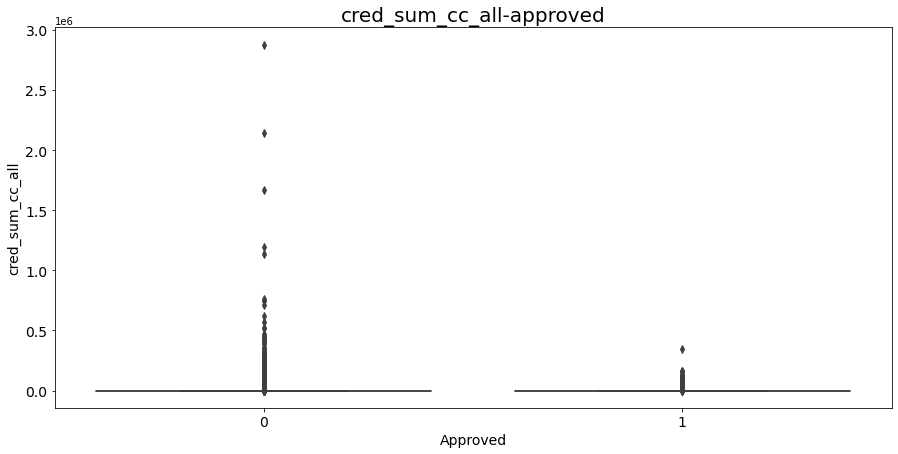

In [220]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='approved', y='cred_sum_overdue_cc_all', data=df)

plt.title('cred_sum_cc_all-approved', fontsize=20)
plt.ylabel('cred_sum_cc_all', fontsize=14)
plt.xlabel('Approved', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);


In [221]:
df[df.approved == 0].cred_sum_overdue_cc_all.describe()

count    1.584700e+04
mean     6.786755e+03
std      4.538187e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.878197e+06
Name: cred_sum_overdue_cc_all, dtype: float64

In [223]:
df[df.approved == 1].cred_sum_overdue_cc_all.describe()

count      7269.000000
mean        717.309495
std        7860.629594
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      349132.880000
Name: cred_sum_overdue_cc_all, dtype: float64

Мы видим колосальную разницу в статистических значениях, что подтверждает сказанные выше слова и различие в распределениях. 

# Сэмплинг данных

**Так как в задании говорится про удаление данных, я решил применить алгоритм under_samling, чтобы можно было уменьшить количество примеров мажоритарного класса, что позволит нам уровнять выборки и изменить распределение. Изначально у меня было желание по каждой переменной отфильтровать аномальные значения, но я этого делать не стал, так как для другой переменной они могут быть достоверными, и можно было совершить ошибку. **

In [225]:
from imblearn.under_sampling import RandomUnderSampler

In [258]:
os = RandomUnderSampler(random_state=0)
X = df.loc[:,df.columns!='approved']
Y = df.loc[:,df.columns=='approved']

columns = X.columns

os_x, os_y = os.fit_resample(X,Y)

os_x['approved'] = os_y

data = os_x.loc[:,:]

(0.0, 1.6e-05)

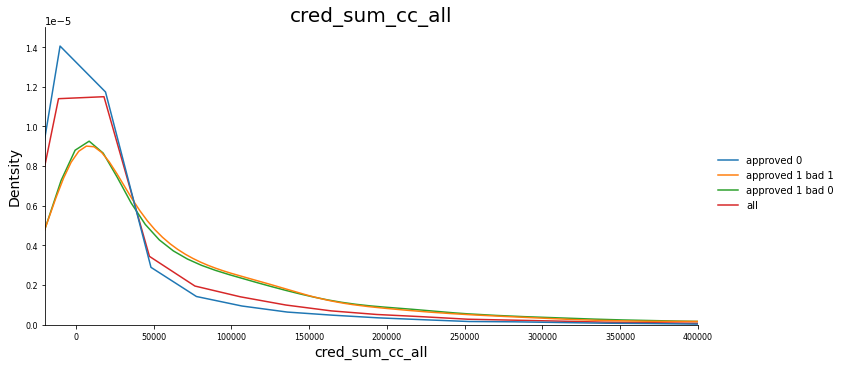

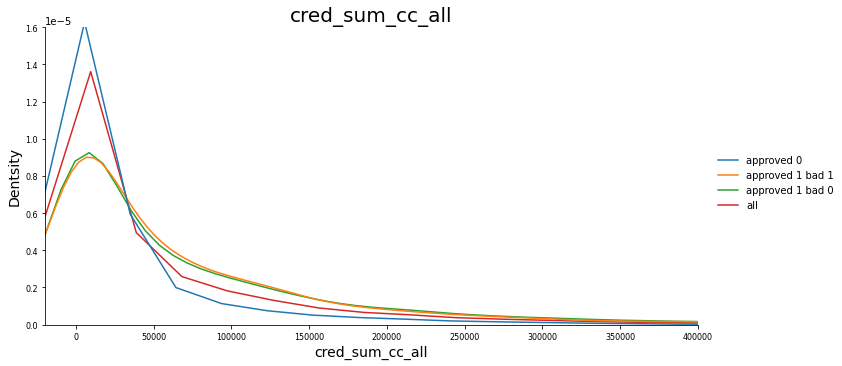

In [276]:
sns.displot(
    {
     "approved 0": df[df.approved == 0].cred_sum_cc_all,
     "approved 1 bad 1": df[df.approved == 1][df.bad == 1].cred_sum_cc_all,
     "approved 1 bad 0": df[df.approved == 1][df.bad == 0].cred_sum_cc_all,
     "all": df.cred_sum_cc_all,
    },
    kind="kde",
    common_norm=False,
    aspect=2
)

plt.title('cred_sum_cc_all', fontsize=20)
plt.xlabel('cred_sum_cc_all', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

plt.xlim(-20000,400000)
plt.ylim(0,0.000015)


sns.displot(
    {
     "approved 0": data[data.approved == 0].cred_sum_cc_all,
     "approved 1 bad 1": data[data.approved == 1][data.bad == 1].cred_sum_cc_all,
     "approved 1 bad 0": data[data.approved == 1][data.bad == 0].cred_sum_cc_all,
     "all": data.cred_sum_cc_all,
    },
    kind="kde",
    common_norm=False,
    aspect=2
)

plt.title('cred_sum_cc_all', fontsize=20)
plt.xlabel('cred_sum_cc_all', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

plt.xlim(-20000,400000)
plt.ylim(0,0.000016)

Распределение изменилось, данны

(0.0, 0.00025)

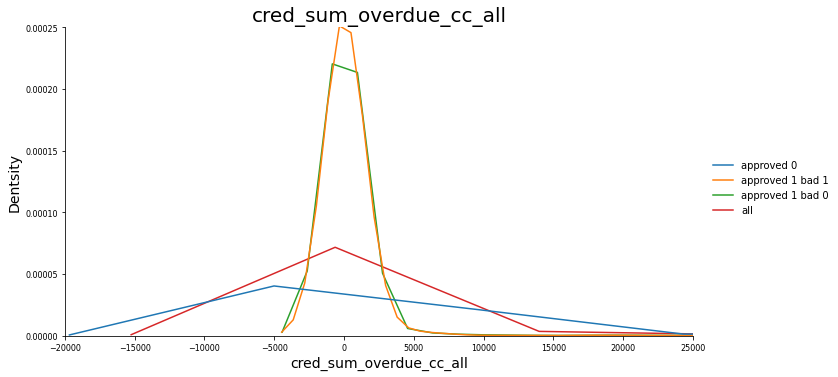

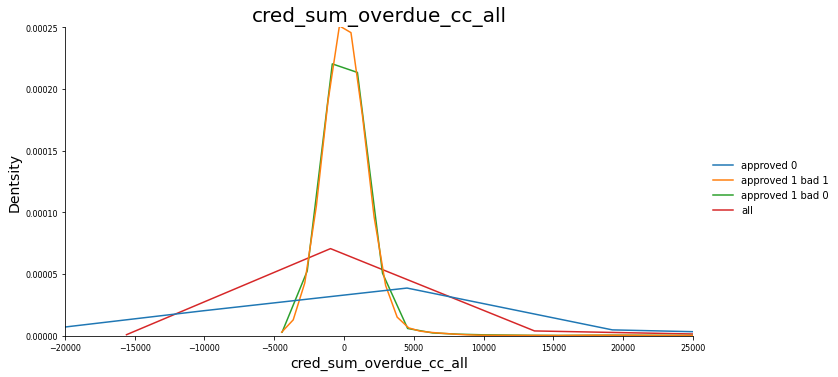

In [269]:
sns.displot(
    {
     "approved 0": df[df.approved == 0].cred_sum_overdue_cc_all,
     "approved 1 bad 1": df[df.approved == 1][df.bad == 1].cred_sum_overdue_cc_all,
     "approved 1 bad 0": df[df.approved == 1][df.bad == 0].cred_sum_overdue_cc_all,
     "all": df.cred_sum_overdue_cc_all,
    },
    kind="kde",
    common_norm=False,
    aspect=2
)

plt.title('cred_sum_overdue_cc_all', fontsize=20)
plt.xlabel('cred_sum_overdue_cc_all', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

plt.xlim(-20000,25000)
plt.ylim(0,0.00025)


sns.displot(
    {
     "approved 0": data[data.approved == 0].cred_sum_overdue_cc_all,
     "approved 1 bad 1": data[data.approved == 1][data.bad == 1].cred_sum_overdue_cc_all,
     "approved 1 bad 0": data[data.approved == 1][data.bad == 0].cred_sum_overdue_cc_all,
     "all": data.cred_sum_overdue_cc_all,
    },
    kind="kde",
    common_norm=False,
    aspect=2
)

plt.title('cred_sum_overdue_cc_all', fontsize=20)
plt.xlabel('cred_sum_overdue_cc_all', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

plt.xlim(-20000,25000)
plt.ylim(0,0.00025)

In [270]:
df[df.approved == 1].cred_sum_overdue_cc_all.describe()

count      7269.000000
mean        717.309495
std        7860.629594
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      349132.880000
Name: cred_sum_overdue_cc_all, dtype: float64

In [271]:
df.cred_sum_overdue_cc_all.describe()

count    2.311600e+04
mean     4.878172e+03
std      3.793714e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.878197e+06
Name: cred_sum_overdue_cc_all, dtype: float64

In [275]:
data[data.approved == 1].cred_sum_overdue_cc_all.describe()

count      7269.000000
mean        717.309495
std        7860.629594
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      349132.880000
Name: cred_sum_overdue_cc_all, dtype: float64

In [274]:
data.cred_sum_overdue_cc_all.describe()

count    1.453800e+04
mean     3.832159e+03
std      3.533762e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.878197e+06
Name: cred_sum_overdue_cc_all, dtype: float64

Распределение не изменилось, но среднее значение стало немного ближке к общей выбрке.

## Итог

В ходе выполненного задания я посмотрел различные закономерности, которые есть в данных,  дал характеристику переменным, сделал процедуру сэмплинга, в целом, чтобы получить еще более значимые различия в распределении, но я этого делать не стал, так как я считаю, что это может повлиять на итоговый результат не в лучшую сторону, и не факт что он будет достоверным. 